In [1]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r'D:\data\Final_Train.xlsx')
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


* Qualification: Qualification and degrees held by the doctor

* Experience: Experience of the doctor in number of years

* Rating: Rating given by patients

* Profile: Type of the doctor

* Miscellaeous_Info: Extra information about the doctor

* Fees: Fees charged by the doctor

* Place: Area and the city where the doctor is located.


In [3]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
df.shape

(5961, 7)

* The dataset has shape with 5961 rows & 7 columns.
* The dataset has 1 int64 & 6 object as datatype columns.
* The dataset has null values

In [6]:
# Summary Statistic

In [7]:
df.describe(include='all')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961,5961,2659,5936,5961,3341,5961.000000
unique,1420,64,51,877,6,2998,NaN
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,NaN
freq,488,323,684,75,1397,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,307.944640
std,NaN,NaN,NaN,NaN,NaN,NaN,190.920373
min,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,150.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,500.000000


In [8]:
df['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

* The fees column has maximum fees is 950 and minimun fees is 50.
* The mean of the fees is 307.94 and the standard deviation is 190.92.
* The Qualification of doctor is mostly BDS i.e 488 of the doctors has done BDS.
* The 323 doctor has 9 years of experience.
* 684 doctors got 100% rating.
* 75 doctors are from HSR layout,Banglore.
* 1397 doctors are Dentist.

In [9]:
# Data Visualation

In [10]:
df.isnull().head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,True,False,False,True,False
3,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

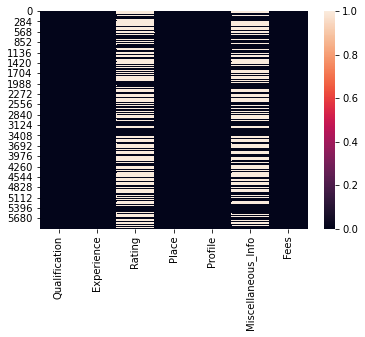

In [12]:
sns.heatmap(df.isnull())

In [13]:
# Replace the Null values.

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
imp=SimpleImputer(strategy='most_frequent')
df['Rating']=imp.fit_transform(df['Rating'].values.reshape(-1,1))

In [16]:
df['Place']=imp.fit_transform(df['Place'].values.reshape(-1,1))

In [17]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [18]:
# Drop the columns

In [19]:
df.drop(['Miscellaneous_Info'],axis=1,inplace=True)

* The column 'Miscellaneous_Info' is having complex data and had almost 40% of null values so it is best to drop the column.

In [20]:
df.shape

(5961, 6)

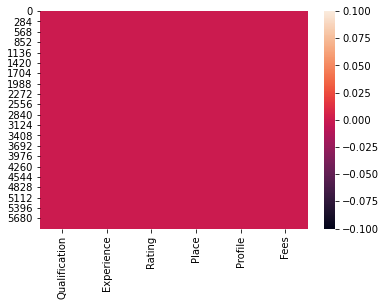

In [21]:
sns.heatmap(df.isnull())

* The null data is removed from the dataset.

In [22]:
 # Visualization  univarient and bivarient 

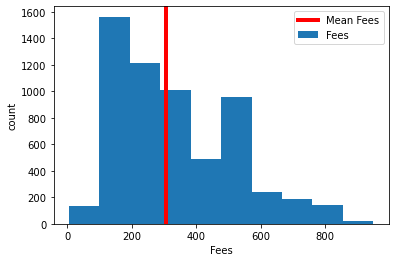

307.9446401610468


In [23]:
df['Fees'].plot.hist()
mean_val=np.mean(df['Fees']);
plt.axvline(mean_val,linewidth=4,color='red',label='Mean Fees')
plt.xlabel('Fees')
plt.ylabel('count')
plt.legend()
plt.show()
print(df['Fees'].mean())

* The mean fees of the doctors is 307.94.

In [24]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile', 'Fees'], dtype='object')

BDS               488
BHMS              477
BAMS              471
MBBS              334
MBBS, MS - ENT    220
Name: Qualification, dtype: int64


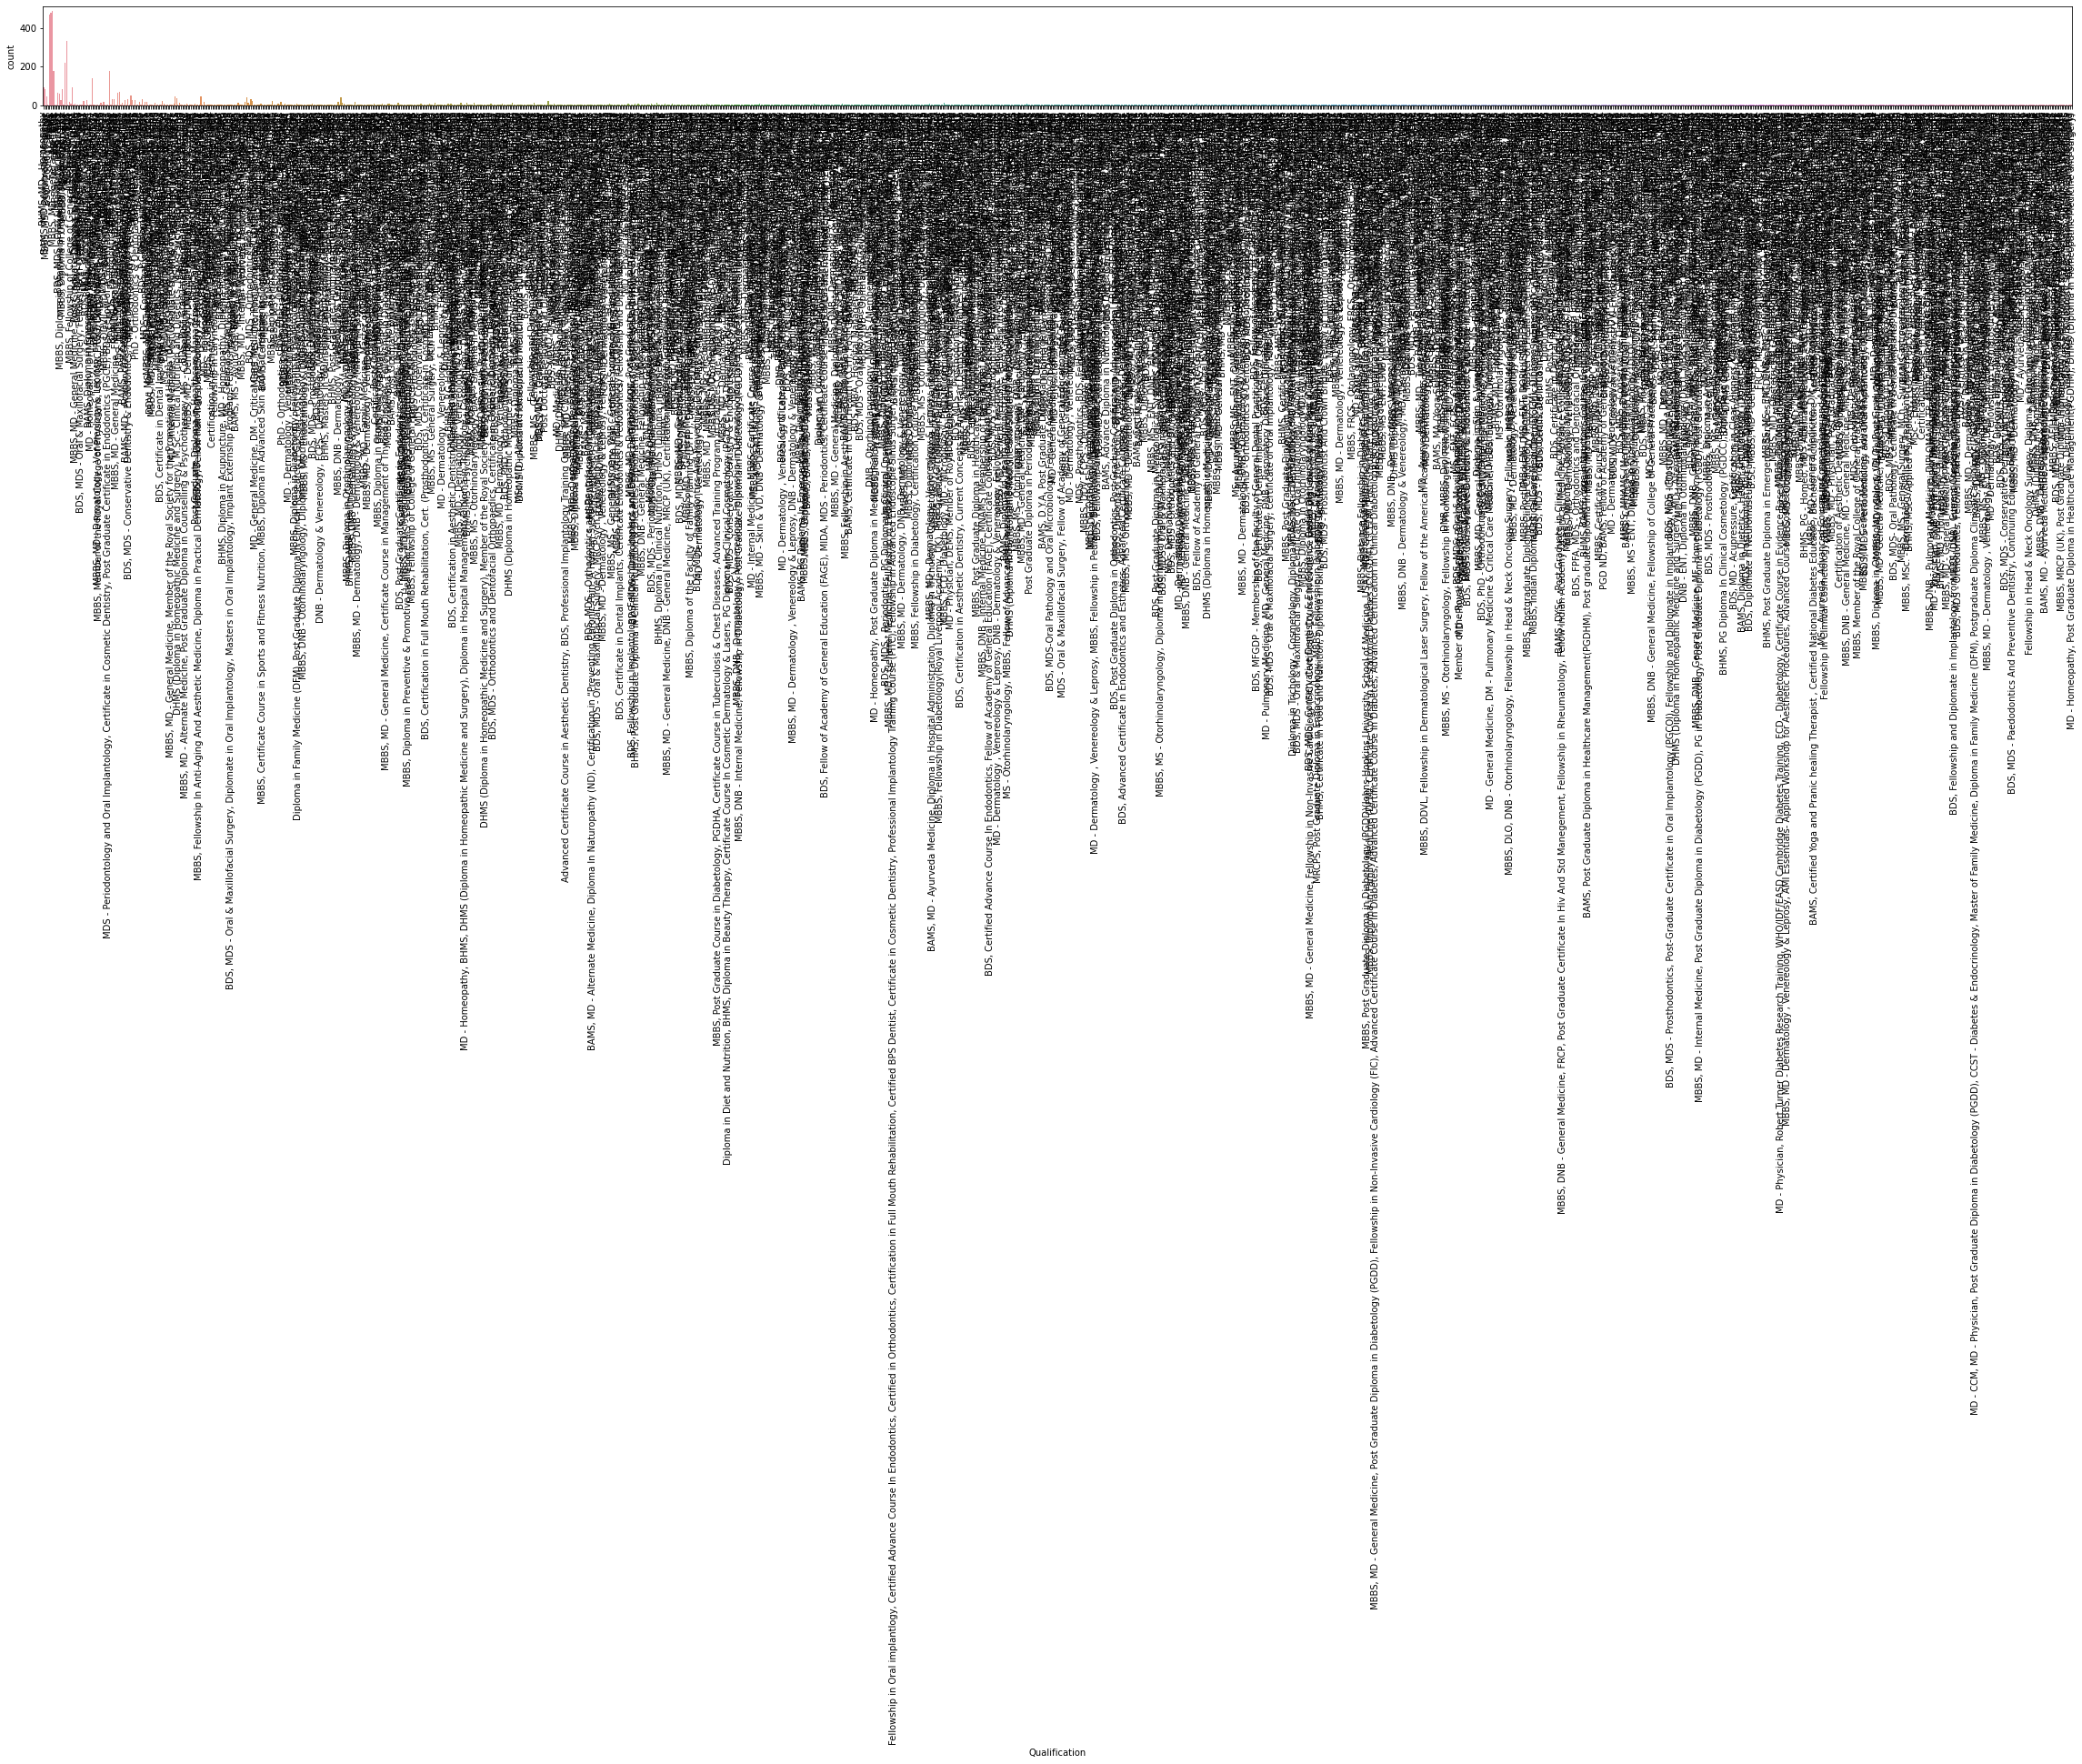

In [25]:
plt.figure(figsize=(40,2))
sns.countplot(df['Qualification'])
plt.xticks(rotation=90)
print((df['Qualification'].value_counts()).head())

* The Qualification of the doctors with top 3 qualification are BDS i.e 488, BHMS i.e 477 and BAMS i.e 471.

100%    3986
98%      290
99%      259
97%      241
96%      220
Name: Rating, dtype: int64


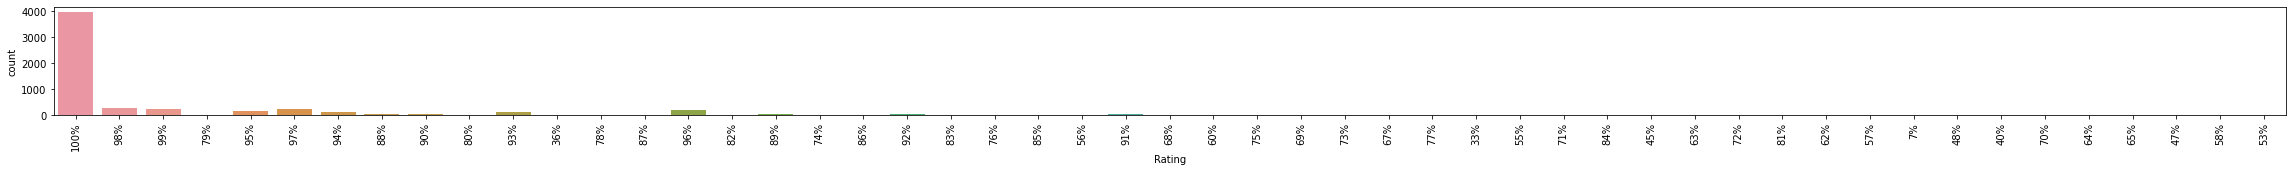

In [26]:
plt.figure(figsize=(40,2))
sns.countplot(df['Rating'])
plt.xticks(rotation=90)
print((df['Rating'].value_counts()).head())

* The Rating of the Doctors with top 3 Rating times given to the doctor are  100% i.e 3986 , 98% i.e 290 & 99% i.e 259.

HSR Layout, Bangalore       100
Andheri West, Mumbai         70
Dwarka, Delhi                67
Banjara Hills, Hyderabad     64
Mulund West, Mumbai          54
Name: Place, dtype: int64


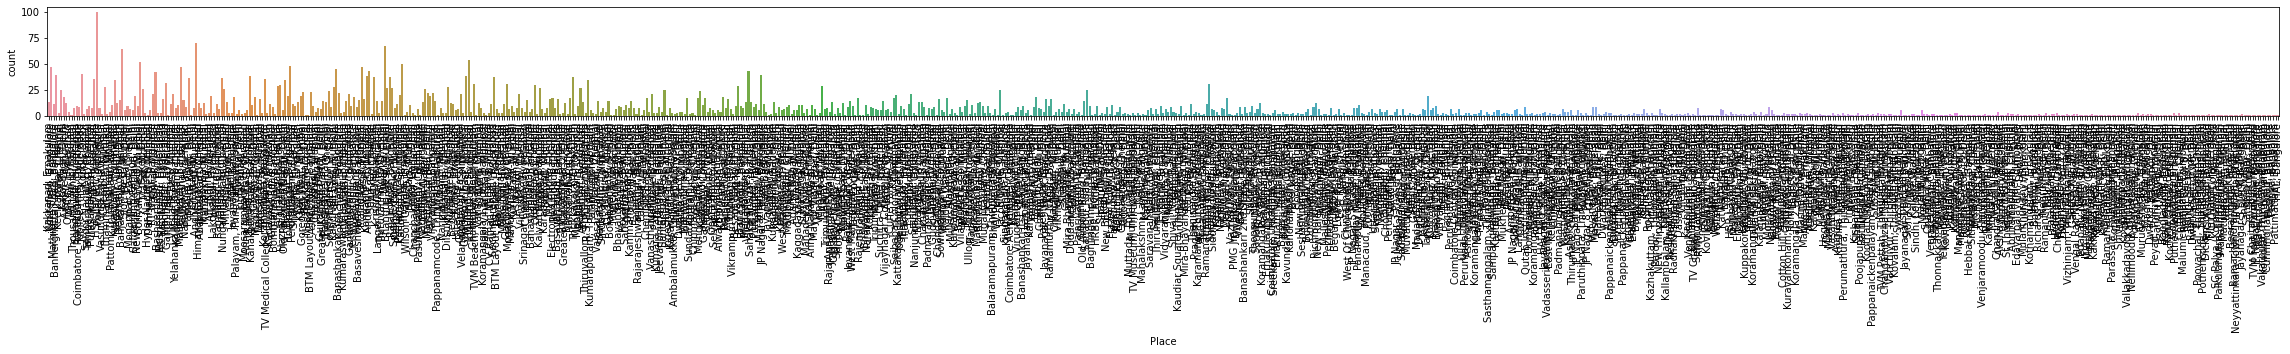

In [27]:
plt.figure(figsize=(40,2))
sns.countplot(df['Place'])
plt.xticks(rotation=90)
print((df['Place'].value_counts()).head())

* The top 3 places where doctors are situated are 'HSR Layout, Bangalore' i.e 100 ,'Andheri West, Mumbai' i.e 70 and 'Dwarka, Delhi' i.e 67.




9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
Name: Experience, dtype: int64


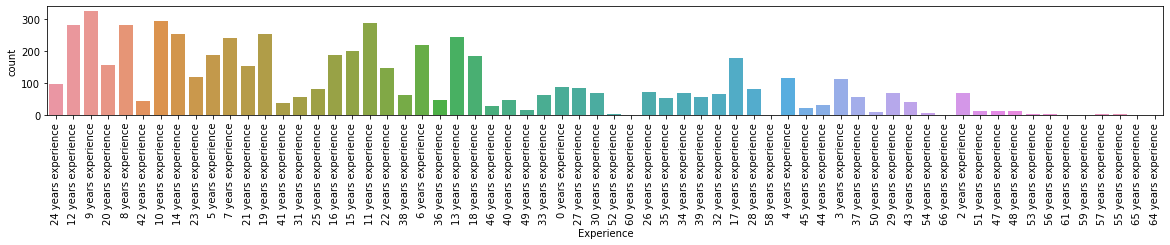

In [28]:
plt.figure(figsize=(20,2))
sns.countplot(df['Experience'])
plt.xticks(rotation=90)
print((df['Experience'].value_counts()).head())

* The top 3 experience a doctors have are '9 years' i.e 323,  '10 years' i.e 294 &  '11 years' i.e 288.

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
Name: Profile, dtype: int64


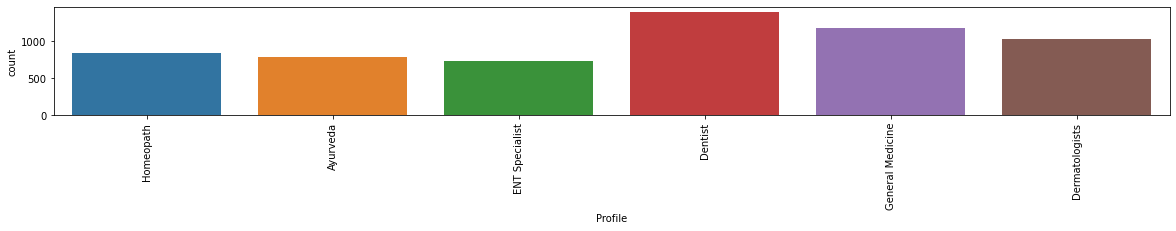

In [29]:
plt.figure(figsize=(20,2))
sns.countplot(df['Profile'])
plt.xticks(rotation=90)
print((df['Profile'].value_counts()).head())

* The top 3 Specialisation of the doctors are Dentist i.e 1397, General Medicine i.e 1173 & Dermatologists i.e 1034.




In [31]:
# Categorical data is converted into numerical data.

In [32]:
 from sklearn import preprocessing

le=preprocessing.LabelEncoder()

list=['Qualification', 'Experience', 'Rating', 'Place', 'Profile'];

for val in list:
    df[val]=le.fit_transform(df[val])

In [33]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,401,16,0,299,5,100
1,73,3,49,866,0,350
2,1135,63,0,457,3,300
3,464,3,0,68,0,250
4,10,12,0,337,0,250


* The datatype of columns 'Qualification', 'Experience', 'Rating', 'Place' & 'Profile' are 'object'  so the values in these columns are changed into numerical datatype.

In [34]:
# To check Outliers with Boxplot methord

Qualification       AxesSubplot(0.125,0.125;0.110714x0.755)
Experience       AxesSubplot(0.257857,0.125;0.110714x0.755)
Rating           AxesSubplot(0.390714,0.125;0.110714x0.755)
Place            AxesSubplot(0.523571,0.125;0.110714x0.755)
Profile          AxesSubplot(0.656429,0.125;0.110714x0.755)
Fees             AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

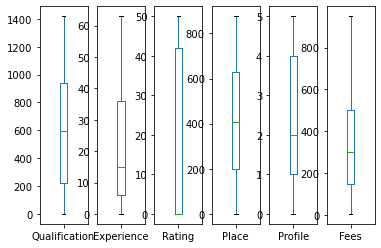

In [35]:
df.plot(kind='box',subplots=True)

* The boxplot methord shows very less outliers are present in the dataset.

In [36]:
# Remove outliers

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.47330574, 0.33488263, 0.68765304, 0.44625322, 1.54301587,
        1.08926083],
       [1.26594438, 0.95584022, 1.63068173, 1.74694981, 1.47289258,
        0.22029544],
       [1.30046489, 1.91011789, 0.68765304, 0.16490388, 0.33665249,
        0.04161581],
       ...,
       [0.0020724 , 0.57267077, 1.58336878, 0.76730411, 0.93983418,
        1.52985171],
       [0.83648129, 0.81254231, 1.2521781 , 1.68506049, 0.93983418,
        1.08926083],
       [0.85512557, 0.71701038, 0.68765304, 0.729644  , 0.86971089,
        0.56543832]])

In [38]:
thresold=3
print(np.where(z>3))

(array([ 275,  293,  987, 1314, 1631, 2165, 2252, 2393, 2428, 2522, 2623,
       2708, 3365, 4040, 4581, 4730, 4835, 5195, 5250, 5311], dtype=int64), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
      dtype=int64))


In [39]:
dn=df[(z<3).all(axis=1)]

In [40]:
print(df.shape ,'\t',dn.shape)

(5961, 6) 	 (5941, 6)


In [41]:
df=dn

* The outliers are removed from the data. The old rows are 5961 and new rows are 5941.

In [42]:
# distplot

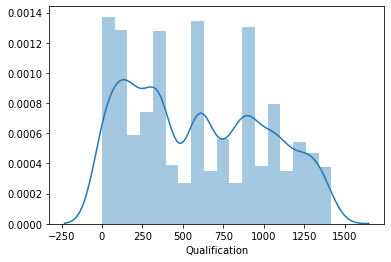

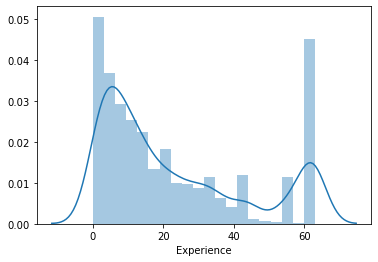

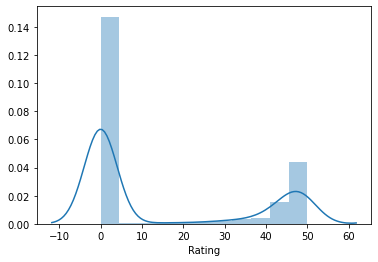

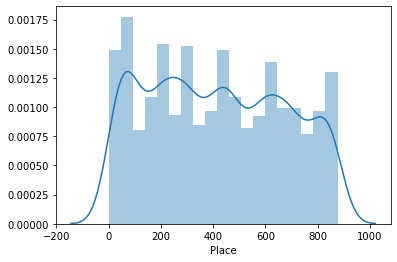

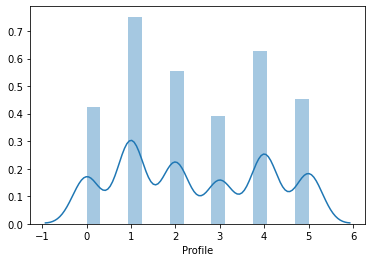

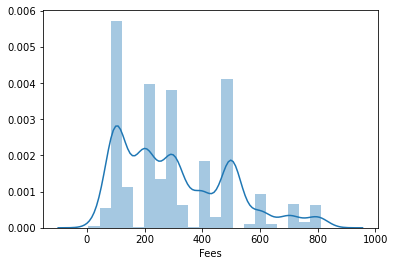

<Figure size 432x288 with 0 Axes>

In [43]:
for i in df.columns:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.figure()

In [44]:
# pairplot

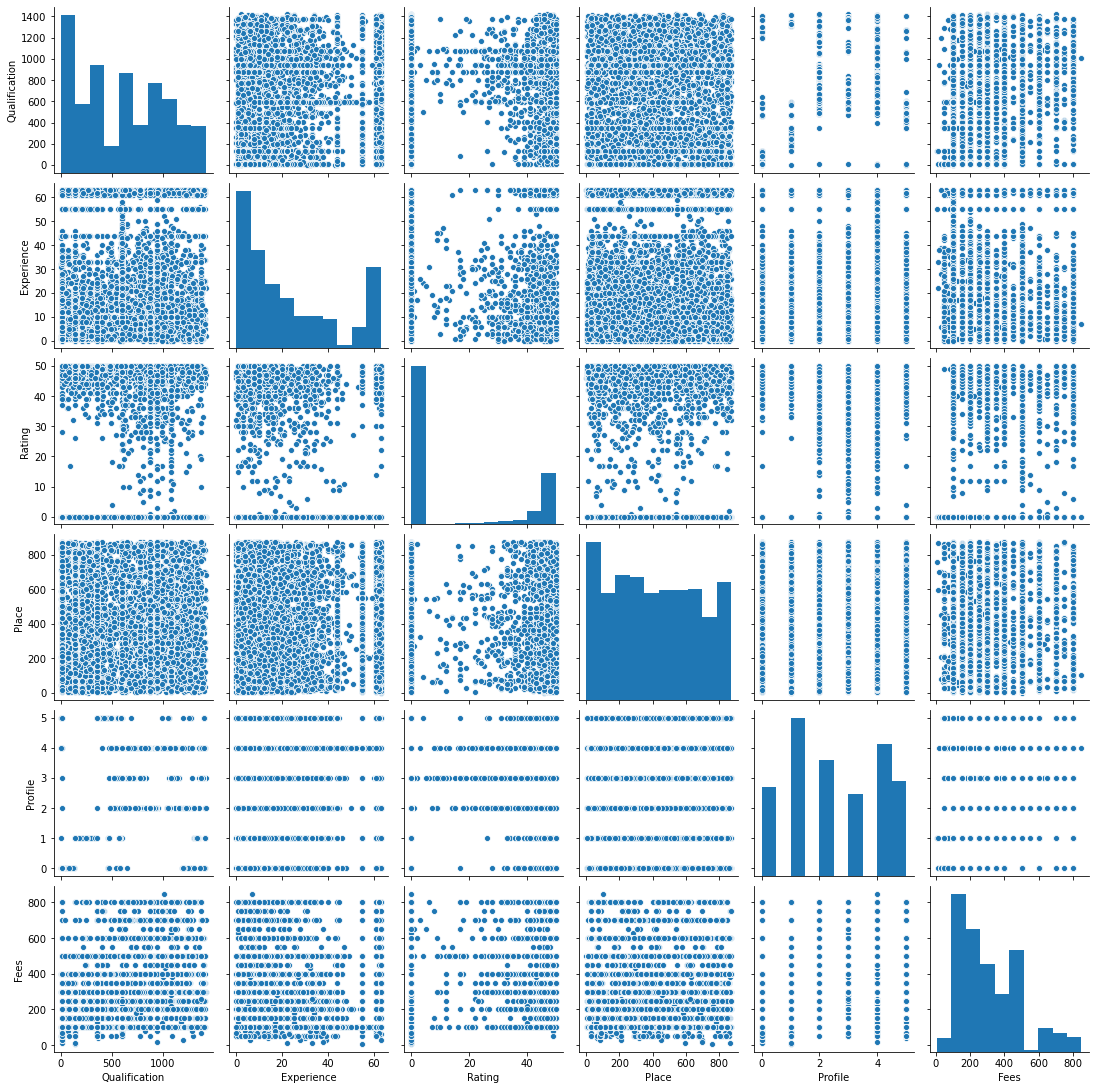

In [45]:
sns.pairplot(df)

In [46]:
df.skew()

Qualification    0.242035
Experience       0.825063
Rating           0.817459
Place            0.125450
Profile          0.111080
Fees             0.714016
dtype: float64

* The Pairplot & distplot shows the skewnees present in the dataset, df.skew() shows the mathematical representaion of the skewness present in the dataset.

In [47]:
# Remove Skewness

In [48]:
from sklearn.preprocessing import power_transform
print(power_transform(df))

[[-0.2657818   0.03369643 -0.70344388 -0.29851938  1.42098131 -1.29446155]
 [-1.39719695 -1.20108042  1.4439594   1.52087856 -1.64338418  0.45557112]
 [ 1.17401081  1.47957262 -0.70344388  0.28628396  0.42080842  0.21204022]
 ...
 [ 0.18812074  0.81012922  1.44102922 -0.65236702  0.94145766  1.37780508]
 [ 0.85371206 -0.76066587  1.41750703  1.47741427  0.94145766 -1.29446155]
 [-0.71432737 -0.5482108  -0.70344388  0.76170738 -0.82009537 -0.38888954]]


* The power Transform methord is used to remove the skewness from the data.

In [49]:
# Model Training

In [50]:
xn=df.drop(['Fees'],axis=1)

In [51]:
y=df['Fees']
y=pd.DataFrame(data=y)

In [52]:
# scaling the data

In [53]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(xn)
x=pd.DataFrame(x,columns=xn.columns)

In [54]:
# Finding the best random state for the linear Regression model.

In [55]:
max_r_score=0;
for r in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=r)
    ln=LinearRegression()
    ln.fit(x_train,y_train) 
    pred=ln.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2> max_r_score:
        max_r_score=r2;
        final_r_state=r;
print('max r2 score for random state:',final_r_state,"is:",max_r_score)

max r2 score for random state: 5 is: 0.11803642624153265


In [56]:
# the Linear Regression model is giving beat result at randaom state at 5.

In [57]:
print(x_train.shape ,'\t',y_train.shape)

(4633, 5) 	 (4633, 1)


In [58]:
print(x_test.shape ,'\t',y_test.shape)

(1308, 5) 	 (1308, 1)


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=5)

In [60]:
ln=LinearRegression()
ln.fit(x_train,y_train) 
pred=ln.predict(x_test)

In [61]:
ln.score(x_train,y_train)

0.08628329927178535

In [62]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

errors:
Mean absolute error: 146.3665254466971
Mean squared error: 31666.322309848034
Root mean squared error: 177.95033663876006


In [63]:
print(r2_score(y_test,pred))

0.11803642624153265


* The Linear Regression model is giving the r2 score of 0.1023.

In [64]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet   

In [65]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()];

In [66]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(m,'\n')
    print('errors:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm),'\n')
    print('Mean squared error:',mean_squared_error(y_test,predm),'\n')
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predm)),'\n')
    print('r2_score:',r2_score(y_test,predm),'\n')
    print('**********************************************************************************************************************')
    print('\n')

DecisionTreeRegressor() 

errors:
Mean absolute error: 177.05045871559633 

Mean squared error: 57930.888379204895 

Root mean squared error: 240.68836361404115 

r2_score: -0.6134785986826397 

**********************************************************************************************************************


KNeighborsRegressor() 

errors:
Mean absolute error: 145.19113149847095 

Mean squared error: 33960.22935779816 

Root mean squared error: 184.2830142953988 

r2_score: 0.05414702228474133 

**********************************************************************************************************************


SVR() 

errors:
Mean absolute error: 142.7609402549891 

Mean squared error: 32837.48911412618 

Root mean squared error: 181.2111727077726 

r2_score: 0.08541734120660249 

**********************************************************************************************************************


Lasso() 

errors:
Mean absolute error: 146.6031299658427 

Mean squared error

In [67]:
# GridSearchCV is used for Hypertunning the Best model.

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':(42,100)}

In [70]:
ridge=Ridge()
clf=GridSearchCV(ridge,parameters)
clf.fit(x_train,y_train)
sorted(clf.cv_results_.keys())
print(clf.best_params_)

{'alpha': 1, 'random_state': 42}


* The best parameters for Lasso models are 'alpha': 1 & 'random_state': 42.

In [71]:
ridge=Ridge(alpha=1,random_state=42)
ridge.fit(x_train,y_train) 
predr=ridge.predict(x_test)

In [72]:
 print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,predr))
print('Mean squared error:',mean_squared_error(y_test,predr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predr)))

errors:
Mean absolute error: 146.36782271892534
Mean squared error: 31666.540386882225
Root mean squared error: 177.95094938460494


In [73]:
print(r2_score(y_test,predr))

0.11803035240704851


In [74]:
#Ensemble Techniques

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [76]:
# RandomForrestRegressor

In [77]:
rf=RandomForestRegressor(n_estimators=100,random_state=11)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)

0.8743428310089937

In [78]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

errors:
Mean absolute error: 135.66516673947868
Mean squared error: 29696.633306754793
Root mean squared error: 172.32711135150728


In [79]:
print(r2_score(y_test,predrf))

0.17289577919584187


In [80]:
# AdaBoostRegressor

In [81]:
ada=AdaBoostRegressor(base_estimator=ridge,n_estimators=50)
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
ada.score(x_train,y_train)

0.06949436533132214

In [82]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,predada))
print('Mean squared error:',mean_squared_error(y_test,predada))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predada)))

errors:
Mean absolute error: 151.38185730945955
Mean squared error: 32216.317241100212
Root mean squared error: 179.48904490553235


In [83]:
print(r2_score(y_test,predada))

0.10271808613339328


In [84]:
# Cross Validation

In [85]:
rfscore=cross_val_score(rf,x,y,cv=5)
print(rfscore)

[0.10609066 0.13103483 0.17459611 0.12102433 0.1876702 ]


In [86]:
print(rfscore.mean(),rfscore.std())

0.14408322513682173 0.03154764273846758


In [87]:
# Plotting the predicted data and Y_test data

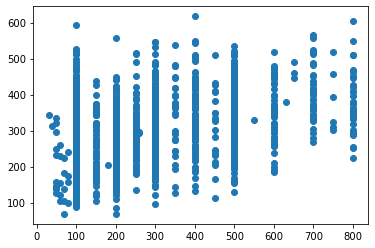

In [88]:
plt.scatter(y_test,predrf)

* The scatter plot shows the relation between y_test and predicted data.

In [89]:
# Saving the best model 

In [90]:
import joblib

In [91]:
joblib.dump(rf,'doctor_fees_dataset.pkl')

['doctor_fees_dataset.pkl']

# Test data

In [92]:
dt=pd.read_excel(r'D:\data\Final_Test.xlsx')
dt.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [93]:
dt.shape

(1987, 6)

In [94]:
dt.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [95]:
# Replace the Null values.

In [96]:
from sklearn.impute import SimpleImputer

In [97]:
imp=SimpleImputer(strategy='most_frequent')
dt['Rating']=imp.fit_transform(dt['Rating'].values.reshape(-1,1))

In [98]:
dt['Place']=imp.fit_transform(dt['Place'].values.reshape(-1,1))

In [99]:
dt.isnull().sum()

Qualification           0
Experience              0
Rating                  0
Place                   0
Profile                 0
Miscellaneous_Info    834
dtype: int64

* Null values are removed from the dataset.

In [100]:
# Drop the column

In [101]:
dt.drop(['Miscellaneous_Info'],axis=1,inplace=True)

* The column 'Miscellaneous_Info' is having complex data and had almost 40% of null values so it is best to drop the column.

In [102]:
# Categorical data is converted into numerical data.

In [103]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

list=['Qualification', 'Experience', 'Rating', 'Place', 'Profile'];

for val in list:
    dt[val]=le.fit_transform(dt[val])

In [104]:
# Removing outliers

In [105]:
from scipy.stats import zscore
z=np.abs(zscore(dt))
z

array([[0.1020893 , 0.32585765, 0.68687215, 0.84397532, 0.90167305],
       [0.43041389, 0.11273087, 0.68687215, 1.67253592, 0.29700739],
       [0.01064936, 0.64554782, 0.05553299, 0.44179316, 0.30765827],
       ...,
       [1.1511758 , 1.81774509, 0.68687215, 0.77624425, 0.90167305],
       [1.12406513, 1.00618471, 1.69818689, 1.51044861, 0.91232393],
       [0.66708198, 1.7644634 , 0.68687215, 0.60388046, 0.30765827]])

In [106]:
thresold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [107]:
dtn=dt[(z<3).all(axis=1)]

In [108]:
print(dt.shape ,'\t',dtn.shape)

(1987, 5) 	 (1987, 5)


*  No Outliers are present in the dataset.

In [109]:
# Removing Skewnees

In [110]:
from sklearn.preprocessing import power_transform
print(power_transform(dtn))

[[ 0.11502176  0.59975275 -0.71488767 -0.7530548   0.90387128]
 [ 0.56196288  0.43138535 -0.71488767  1.48748742  0.36397158]
 [ 0.19737508  0.82190278  1.12752766 -0.31313077 -0.22219934]
 ...
 [ 1.07535349  1.44716095 -0.71488767  0.79217176  0.90387128]
 [-1.1531878  -1.21969931  1.4399092  -1.71996514 -0.87701584]
 [ 0.73991242  1.42316234 -0.71488767  0.64937297 -0.22219934]]


* The skewness in the dataset is removed.

In [111]:
# Scaling the test data

In [112]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(dtn)
x=pd.DataFrame(x,columns=dtn.columns)

In [113]:
# Loading the best model

In [114]:
load_model=joblib.load('doctor_fees_dataset.pkl')

In [115]:
# loading test data in the best moodel

In [116]:
final_output=load_model.predict(x)

In [117]:
final_output=pd.DataFrame(data=final_output)

In [118]:
final_output.head()

,0
0,348.0
1,293.0
2,287.5
3,279.5
4,234.5
